<a href="https://colab.research.google.com/github/ZahinKhan99/Practice/blob/main/Assignment06_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from skimage import io
import os
import matplotlib.pyplot as plt

In [ ]:
# Function Definitions
def initialize_centroids(data, k):
    """Randomly initialize k centroids."""
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

In [ ]:
def assign_clusters(data, centroids):
    """Assigns each data point to the nearest centroid."""
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

In [ ]:
def update_centroids(data, labels, k):
    """Computes new centroids as the mean of assigned points."""
    return np.array([data[labels == i].mean(axis=0) if np.any(labels == i) else np.zeros(data.shape[1]) for i in range(k)])

In [ ]:
def k_means(data, k, max_iters=100, tol=1e-4):
    """Performs K-Means clustering."""
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        # Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return labels, centroids

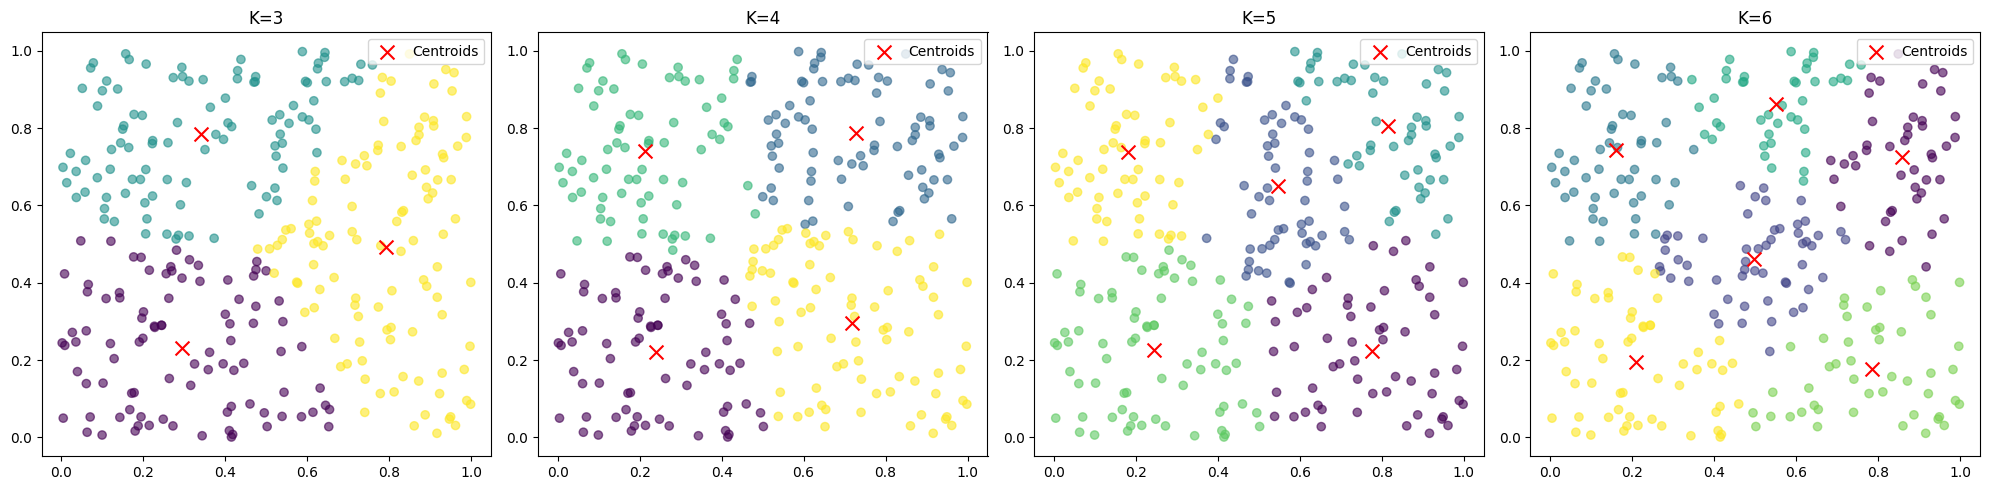

In [ ]:
import matplotlib.pyplot as plt

# Replace X with your actual dataset
X = np.random.rand(300, 2)  # This is placeholder data. Replace with your 2D dataset.

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for idx, k in enumerate(range(3, 7)):
    labels, centroids = k_means(X, k)
    axs[idx].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
    axs[idx].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
    axs[idx].set_title(f'K={k}')
    axs[idx].legend()
plt.tight_layout()
plt.show()

In [ ]:
# Set image path and check if file exists
image_path = "/content/bird_small.png"
if not os.path.isfile(image_path):
    raise FileNotFoundError(f"Image file not found: {image_path}")

# Load and normalize the image
image = io.imread('/content/bird_small.png') / 255.0
original_shape = image.shape
data = image.reshape(-1, 3)  # Flatten into RGB values

# Apply K-Means
k = 8
labels, centroids = k_means(data, k)

# Reconstruct the compressed image
compressed_data = centroids[labels]  # Map each data point to its centroid
compressed_image = compressed_data.reshape(original_shape)

FileNotFoundError: Image file not found: /content/bird_small.png

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


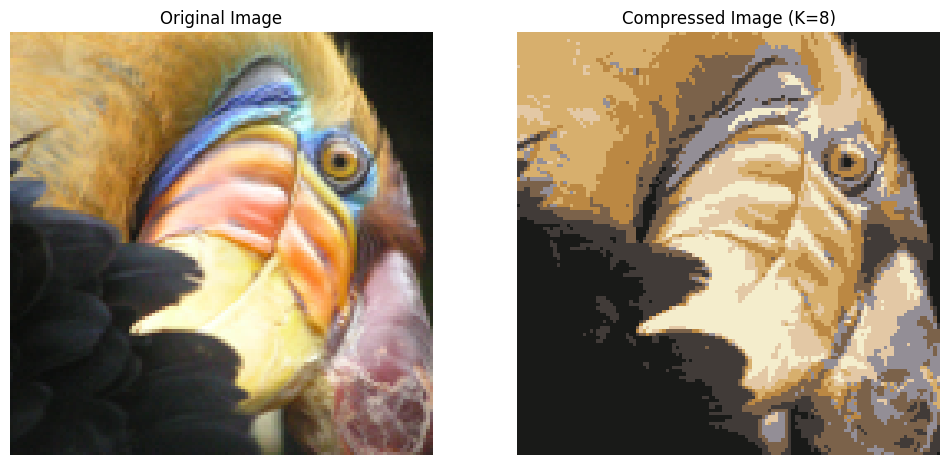

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(compressed_image)
axes[1].set_title(f'Compressed Image (K={k})')
axes[1].axis('off')
plt.show()